In [1]:
import os
import sys
import numpy as np
sys.path.append("/home/humanoid/internalHD/WORKS_HD/DNet-ratina/")

In [2]:
from data_loader_pannuke_coco import Load_Bbox_nuclei

In [3]:
#train_file = "/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_split/train_df.csv"
test_file = "/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_split/val_aug/val_aug.csv"
#train_loader = Load_Bbox_nuclei(mode="train",csv_file=train_file)
test_loader = Load_Bbox_nuclei(mode="val_aug",csv_file=test_file)

In [4]:
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision
# id,image,mask,targets = dataset[np.random.randint(0,2479)]
# print(id)
def denormalize_bbox_coordinates_2(bbox, w,h):
    x_center, y_center, width, height,_ = bbox
    x_min = (x_center - width / 2) 
    y_min = (y_center - height / 2) 
    x_max = (x_center + width / 2) 
    y_max = (y_center + height / 2) 

    return [int(x_min), int(y_min), int(x_max), int(y_max)]
def plot_bbox_with_original(orig_img,image,bboxs,orig_box,orig_classes,mask=None):
    colors = [
    (1.0, 0.0, 0.0),   # Red
    (0.0, 0.0, 1.0),   # Blue
    (0.0, 0.5, 0.0),   # Green
    (1.0, 1.0, 0.0),   # Yellow
    (0.5, 0.0, 0.5),   # Purple
    ]

    _,h,w = image.shape
    try:
        box_list = bboxs.tolist()
    except Exception as e: 
        print("exception",e)
        box_list = bboxs
    total_box = []
    # for b_ in box_list:
    #     total_box.append(denormalize_bbox_coordinates_2(b_,w,h))
    denormalize = transforms.Normalize(mean=[-0.485 / 0.229, -0.456 / 0.224, -0.406 / 0.225],
                                   std=[1 / 0.229, 1 / 0.224, 1 / 0.225])
    image = denormalize(image).permute(1, 2, 0).numpy()
    fig, axs = plt.subplots(1, 3)
    
    for bbox in bboxs:
        x_min, y_min, x_max, y_max,c= bbox
        axs[0].imshow(image)
        axs[0].add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, color=colors[int(c)]))
    for c,bbox in enumerate(orig_box):
        x_min, y_min, x_max, y_max= bbox
        axs[2].imshow(orig_img)
        axs[2].add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, color = colors[orig_classes[c]]))
    if mask is not None:
        print("unique classes", np.unique(mask))
        print("unique labels",np.unique(bboxs[:,4]))
        axs[1].imshow(mask)
    plt.show()
    return image,total_box

In [5]:
import cv2
idx = 0
orig_img = cv2.imread(test_loader.df.iloc[idx]["Image_File"])
orig_box = eval(test_loader.df.iloc[idx]["BBox"])
orig_classes = eval(test_loader.df.iloc[idx]["Label"])
orig_classes = [c-1 for c in orig_classes]
_,img,sem_mask,inst_mask,targets = test_loader[idx]
#print(targets[:,4])
#print(train_loader.df.iloc[idx]["Image_File"])

unique classes [0 2 5]
unique labels [1. 4.]


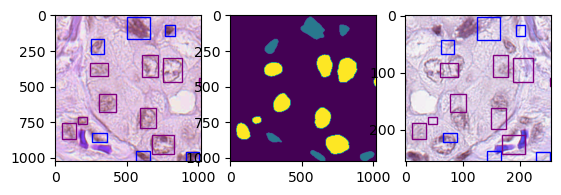

In [6]:
_,_ = plot_bbox_with_original(orig_img,img,targets,orig_box,orig_classes,sem_mask)

In [8]:
idx
problematic_id = 500

In [7]:
test_loader.df.iloc[idx]["Image_File"]

'/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_processed//Bile-duct/images/img_Bile-duct_1_01592.png'

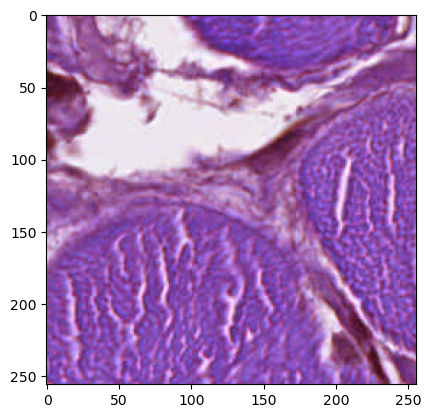

In [4]:
import cv2
orig_img = cv2.imread("/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_processed//HeadNeck/images/img_HeadNeck_1_02147.png")
plt.imshow(orig_img)

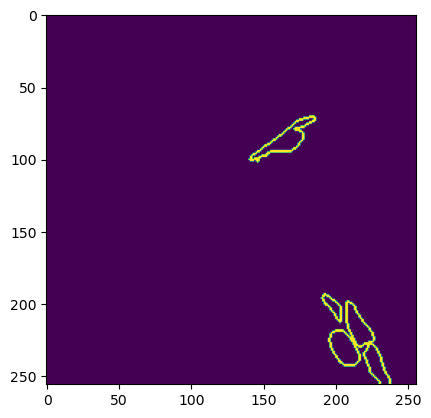

In [5]:
orig_img = cv2.imread("/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_processed//HeadNeck/inst_masks/inst_HeadNeck_1_02147.png",0)
plt.imshow(orig_img)

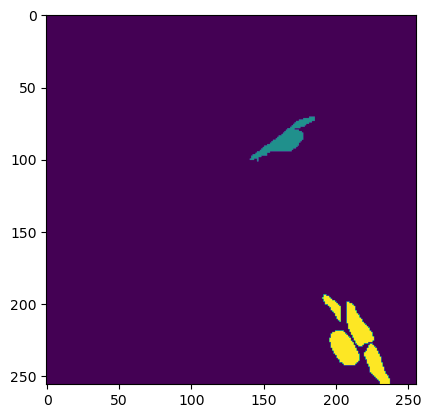

In [6]:

orig_img = cv2.imread("/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_processed//HeadNeck/sem_masks/sem_HeadNeck_1_02147.png",0)
plt.imshow(orig_img)

In [25]:
val_file = "/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_split/val_df.csv"
val_loader = Load_Bbox_nuclei(mode="val",csv_file=val_file)

In [ ]:
Sem_Mask_File
Inst_Mask_File

In [28]:
import shutil
target_folder = "/home/humanoid/internalHD/datasets/multiclass/nucleai_seg/pannuke_split/val/images/"
image_paths = val_loader.df["Image_File"].tolist()
for image_path in image_paths:
    image_name = os.path.basename(image_path)  # Extract the image file name (e.g., "1.jpg")
    target_path = os.path.join(target_folder, image_name)
    shutil.copy(image_path, target_path)

In [29]:
len(val_loader)

613